Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Train")
data_dir_test = pathlib.Path('Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

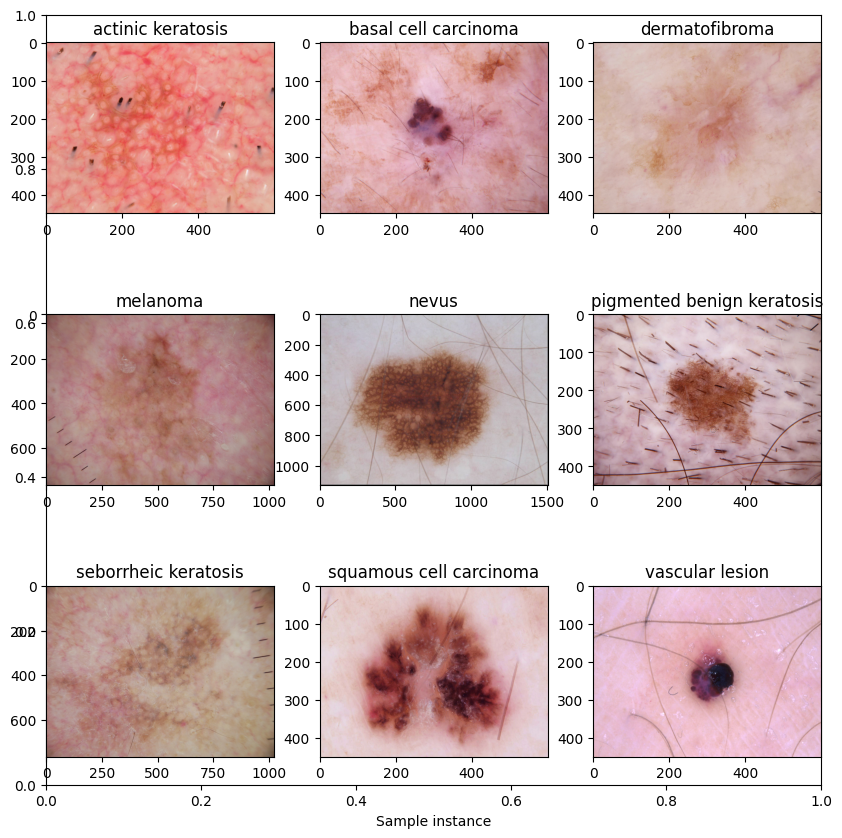

In [16]:
import matplotlib.pyplot as plt
### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10,10))
plt.xlabel('Sample instance')
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [17]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [18]:
### Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255., input_shape=(img_height, img_width,3))])

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [24]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 32)      2432      
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

### Train the model

In [26]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


56/56 [==============================] - 51s 910ms/step - loss: 2.0706 - accuracy: 0.1920 - val_loss: 2.0300 - val_accuracy: 0.1902
Epoch 2/20
56/56 [==============================] - 52s 921ms/step - loss: 2.0348 - accuracy: 0.1892 - val_loss: 2.0146 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 52s 921ms/step - loss: 2.0067 - accuracy: 0.2137 - val_loss: 2.0102 - val_accuracy: 0.2148
Epoch 4/20
56/56 [==============================] - 51s 908ms/step - loss: 1.9882 - accuracy: 0.2199 - val_loss: 2.0287 - val_accuracy: 0.2103
Epoch 5/20
56/56 [==============================] - 50s 893ms/step - loss: 1.9048 - accuracy: 0.2829 - val_loss: 2.0421 - val_accuracy: 0.2103
Epoch 6/20
56/56 [==============================] - 54s 963ms/step - loss: 1.9980 - accuracy: 0.2199 - val_loss: 1.9673 - val_accuracy: 0.2595
Epoch 7/20
56/56 [==============================] - 59s 1s/step - loss: 1.8286 - accuracy: 0.3025 - val_loss: 1.8331 - val_accuracy: 0.3154
Epoch 8/20
56

### Visualizing training results

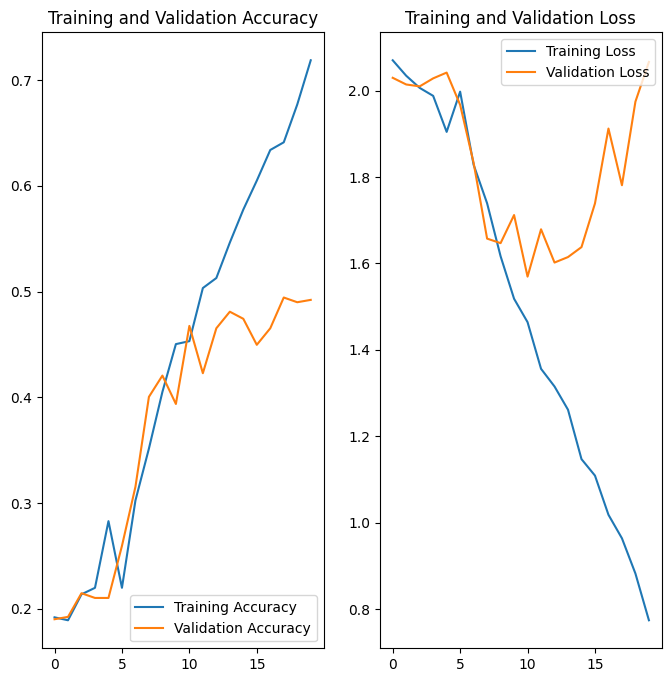

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit



**Finding on the first base model**

- The accuracy is only around 70% as there are many features to remember the pattern.
- It looks like the model is overfitting given the difference between training and validation accuracy. 
- Around 10th epoch we see pattern increase in difference in training and validation loss



In [28]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

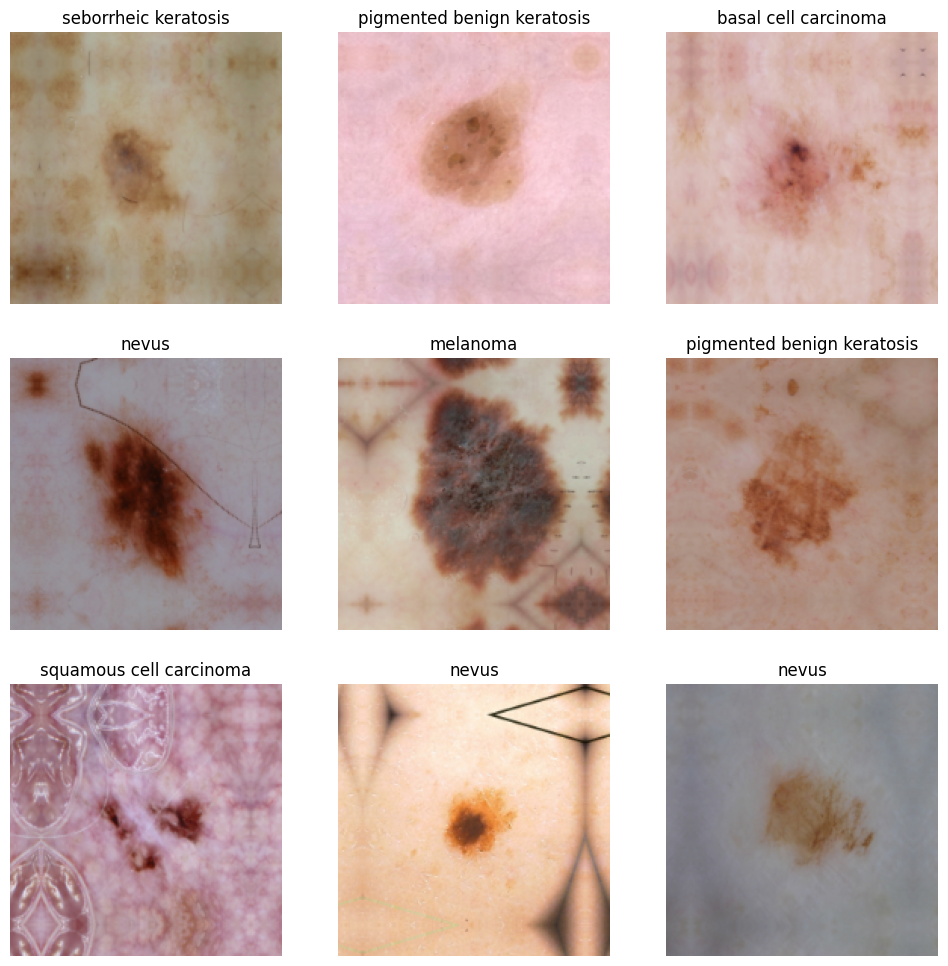

In [29]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [30]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))


### Compiling the model

In [31]:
## Your code goes here
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

### Training the model

In [32]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 60s 1s/step - loss: 2.0694 - accuracy: 0.2115 - val_loss: 1.9716 - val_accuracy: 0.3356
Epoch 2/20
56/56 [==============================] - 61s 1s/step - loss: 1.9580 - accuracy: 0.2623 - val_loss: 1.8840 - val_accuracy: 0.3512
Epoch 3/20
56/56 [==============================] - 60s 1s/step - loss: 1.8515 - accuracy: 0.2919 - val_loss: 1.8369 - val_accuracy: 0.3177
Epoch 4/20
56/56 [==============================] - 66s 1s/step - loss: 1.7314 - accuracy: 0.3677 - val_loss: 1.6107 - val_accuracy: 0.4653
Epoch 5/20
56/56 [==============================] - 67s 1s/step - loss: 1.6681 - accuracy: 0.4174 - val_loss: 1.5789 - val_accuracy: 0.4564
Epoch 6/20
56/56 [==============================] - 69s 1s/step - loss: 1.5275 - accuracy: 0.4548 - val_loss: 1.6279 - val_accuracy: 0.4474
Epoch 7/20
56/56 [==============================] - 68s 1s/step - loss: 1.5158 - accuracy: 0.4587 - val_loss: 1.5712 - val_accuracy: 0.4855
Epoch 8/20
56/56 [==

### Visualizing the results

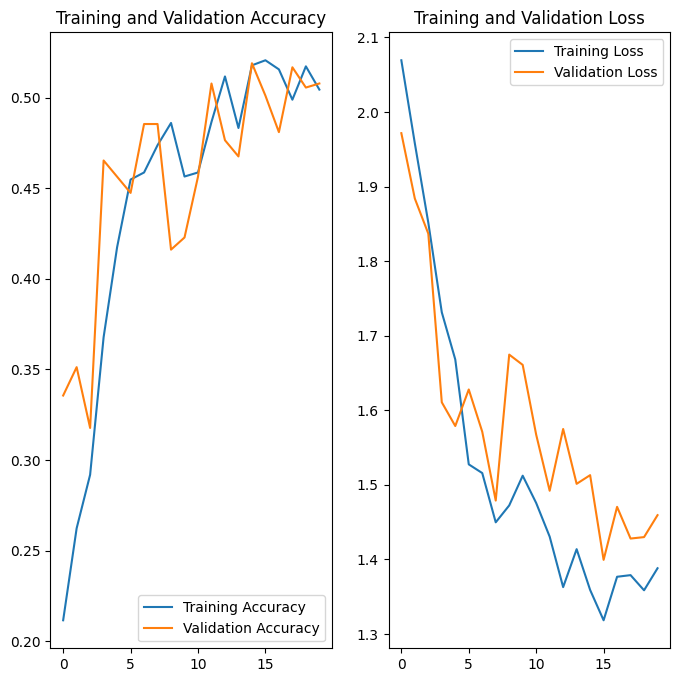

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?
- The accuracy hasn't seen any improvements, but the overfitting problem seems to be addressed thanks to data augmentation. Increasing the number of epochs might lead to improved accuracy, so it's too soon to make a final judgment.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [34]:
##
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,Train/actinic keratosis/ISIC_0029460.jpg,actinic keratosis
1,Train/actinic keratosis/ISIC_0031993.jpg,actinic keratosis
2,Train/actinic keratosis/ISIC_0029500.jpg,actinic keratosis
3,Train/actinic keratosis/ISIC_0026626.jpg,actinic keratosis
4,Train/actinic keratosis/ISIC_0032135.jpg,actinic keratosis
...,...,...
2234,Train/vascular lesion/ISIC_0032919.jpg,vascular lesion
2235,Train/vascular lesion/ISIC_0033031.jpg,vascular lesion
2236,Train/vascular lesion/ISIC_0031197.jpg,vascular lesion
2237,Train/vascular lesion/ISIC_0030882.jpg,vascular lesion


In [35]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,Train/actinic keratosis/ISIC_0029460.jpg,actinic keratosis
1,Train/actinic keratosis/ISIC_0031993.jpg,actinic keratosis
2,Train/actinic keratosis/ISIC_0029500.jpg,actinic keratosis
3,Train/actinic keratosis/ISIC_0026626.jpg,actinic keratosis
4,Train/actinic keratosis/ISIC_0032135.jpg,actinic keratosis
...,...,...
2234,Train/vascular lesion/ISIC_0032919.jpg,vascular lesion
2235,Train/vascular lesion/ISIC_0033031.jpg,vascular lesion
2236,Train/vascular lesion/ISIC_0031197.jpg,vascular lesion
2237,Train/vascular lesion/ISIC_0030882.jpg,vascular lesion


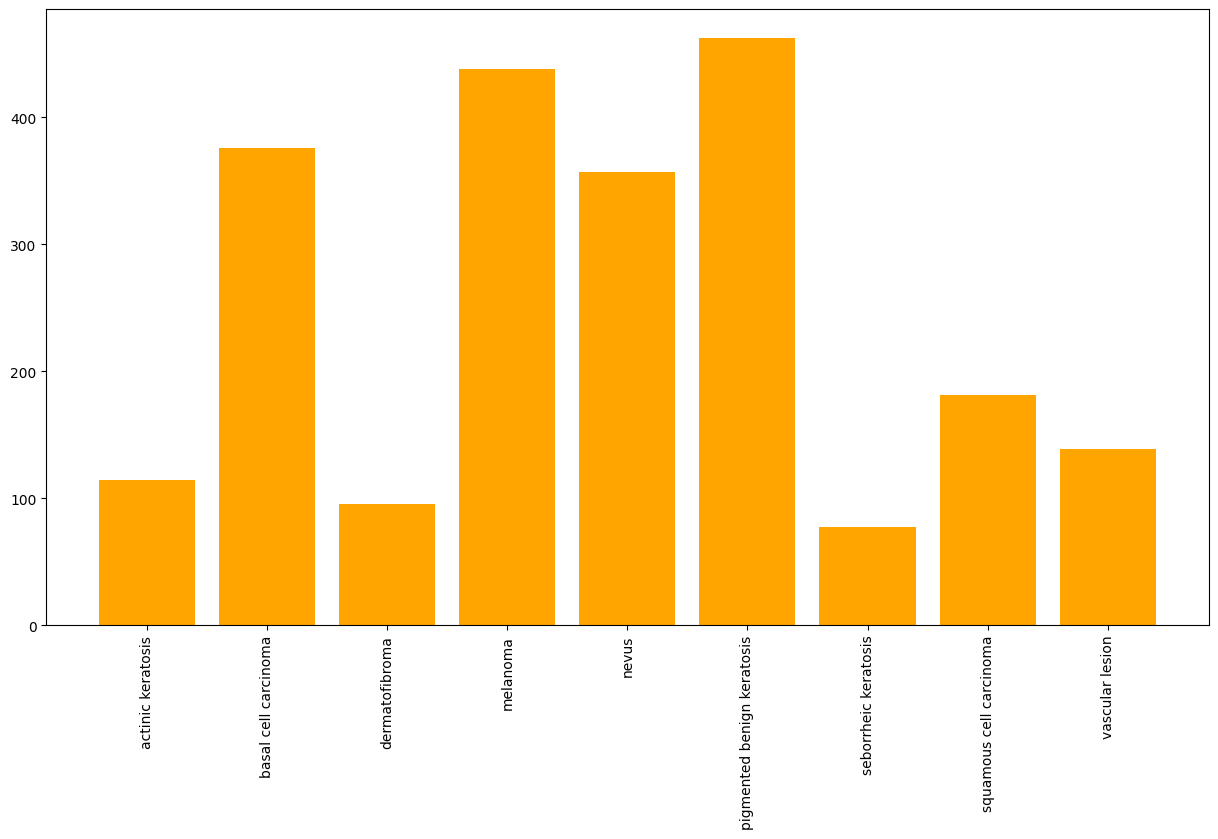

In [36]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(15,8))
plt.bar(class_names,count, color='orange')
plt.xticks(rotation=90)
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
Answer-1 :
- **seborrheic keratosis** has least number of samples

#### - Which classes dominate the data in terms proportionate number of samples?

Answer-2:
- **basal cell carcinoma and pigmented benign keratosis** have proportionate number of classes.
- **melanoma and nevus** have proprtionate number of classes

In [ ]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [37]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("Train",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)  ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2239 image(s) found.
Output directory set to Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=964x720 at 0x38E7ADAD0>: 100%|██████████| 500/500 [00:02<00:00, 227.18 Samples/s]  


Initialised with 2239 image(s) found.
Output directory set to Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x38AA6EC10>: 100%|██████████| 500/500 [00:02<00:00, 192.59 Samples/s]  


Initialised with 2239 image(s) found.
Output directory set to Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x38E874ED0>: 100%|██████████| 500/500 [00:02<00:00, 185.92 Samples/s]                   


Initialised with 2239 image(s) found.
Output directory set to Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x38E5EF610>: 100%|██████████| 500/500 [00:02<00:00, 213.46 Samples/s]                    


Initialised with 2239 image(s) found.
Output directory set to Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x38B343C90>: 100%|██████████| 500/500 [00:02<00:00, 184.29 Samples/s]                    


Initialised with 2239 image(s) found.
Output directory set to Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x38E67A2D0>: 100%|██████████| 500/500 [00:02<00:00, 201.29 Samples/s]                   


Initialised with 2239 image(s) found.
Output directory set to Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x38B2A7D10>: 100%|██████████| 500/500 [00:02<00:00, 220.43 Samples/s]  


Initialised with 2239 image(s) found.
Output directory set to Train/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x2D3339BD0>: 100%|██████████| 500/500 [00:02<00:00, 194.85 Samples/s]                    


Initialised with 2239 image(s) found.
Output directory set to Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x38B3F0390>: 100%|██████████| 500/500 [00:02<00:00, 190.38 Samples/s]                   


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [38]:


data_dir_train1 = pathlib.Path("Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [40]:
for i in class_names:
      
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,Train/actinic keratosis/ISIC_0029460.jpg,actinic keratosis
1,Train/actinic keratosis/ISIC_0031993.jpg,actinic keratosis
2,Train/actinic keratosis/ISIC_0029500.jpg,actinic keratosis
3,Train/actinic keratosis/ISIC_0026626.jpg,actinic keratosis
4,Train/actinic keratosis/ISIC_0032135.jpg,actinic keratosis
...,...,...
6733,Train/output/vascular lesion/vascular lesion_o...,vascular lesion
6734,Train/output/vascular lesion/vascular lesion_o...,vascular lesion
6735,Train/output/vascular lesion/vascular lesion_o...,vascular lesion
6736,Train/output/vascular lesion/vascular lesion_o...,vascular lesion


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    1343
melanoma                      1337
basal cell carcinoma          1118
nevus                         1080
squamous cell carcinoma        566
vascular lesion                437
actinic keratosis              344
dermatofibroma                 289
seborrheic keratosis           225
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [9]:
batch_size = 32
img_height = 180
img_width = 180

In [41]:
import pathlib
data_dir_train1=pathlib.Path("/Train")

In [42]:
data_dir_train1

PosixPath('/Train')

#### **Todo:** Create a training dataset

In [7]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

6267


In [10]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


data_dir_train1=pathlib.Path("/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6267 files belonging to 9 classes.
Using 5014 files for training.


#### **Todo:** Create a validation dataset

In [11]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6267 files belonging to 9 classes.
Using 1253 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [12]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [13]:
## ### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [14]:
epochs =50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


157/157 [==============================] - 905s 5s/step - loss: 2.0320 - accuracy: 0.2429 - val_loss: 1.8422 - val_accuracy: 0.3216
Epoch 2/50
157/157 [==============================] - 42s 262ms/step - loss: 1.8427 - accuracy: 0.3379 - val_loss: 1.7365 - val_accuracy: 0.3990
Epoch 3/50
157/157 [==============================] - 40s 251ms/step - loss: 1.5795 - accuracy: 0.4374 - val_loss: 1.4466 - val_accuracy: 0.4972
Epoch 4/50
157/157 [==============================] - 41s 257ms/step - loss: 1.4021 - accuracy: 0.5034 - val_loss: 1.2386 - val_accuracy: 0.5674
Epoch 5/50
157/157 [==============================] - 40s 248ms/step - loss: 1.2017 - accuracy: 0.5752 - val_loss: 1.2597 - val_accuracy: 0.5563
Epoch 6/50
157/157 [==============================] - 40s 247ms/step - loss: 1.0111 - accuracy: 0.6464 - val_loss: 1.0652 - val_accuracy: 0.6441
Epoch 7/50
157/157 [==============================] - 41s 255ms/step - loss: 0.7933 - accuracy: 0.7200 - val_loss: 1.0664 - val_accuracy: 0.664

#### **Todo:**  Visualize the model results

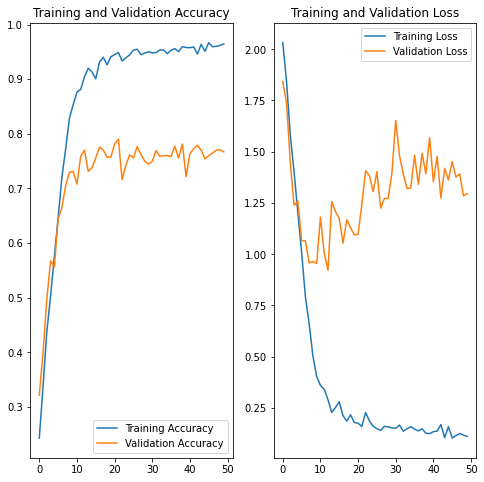

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



- The Augmentor library has led to an improvement in training data accuracy.

- Despite this, the model continues to exhibit overfitting.

- To address overfitting, one can consider adding more layers or neurons and incorporating dropout layers.

- Enhancing the model further can be achieved through hyperparameter tuning.